In [1]:
import pandas as pd#import the pandas module becuase our dataset is a csv file
import numpy as np #import the numpy module becuase our dataset is a csv file
import matplotlib.pyplot as plt#import the matplot library to plot the heatmap to see the correlation
import seaborn as sns#import the seaborn library to plot the heatmap to see the correlation

In [4]:
path = open("thyroid.csv")#here we are defining the path of our dataset file
dataframe = pd.read_csv(path)#here we are using the read_csv function to read the csv file from the path

In [5]:
dataframe #here we are rpinting the dataframe

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [4]:
dataframe.drop("other",axis=1,inplace=True) #here we are dropping the 'other column' of the dataset as it is not much used

In [5]:
fcols = ["age",
                "sex",
                "on_thyroxine",
                "query_on_thyroxine",
                "on_antithyroid_medication",
                "sick",
                "pregnant",
                "thyroid_surgery",
                "I131_treatment",
                "query_hypothyroid",
                "query_hyperthyroid",
                "lithium",
                "goitre",
                "tumor",
                "hypopituitary",
                "psych",
                "TSH measured",
                "TSH",
                "T3_measured",
                "T3",
                "TT4_measured",
                "TT4",
                "T4U_measured",
                "T4U",
                "FTI_measured",
                "FTI",
                "TBG_measured",
                "TBG",
               "target"]

In [6]:
dataframe.columns = fcols #here we are changing the name of the columns in the dataset

In [7]:
dataframe  #printing the dataset first 5 rows again to see the dataset

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,?,t,64,t,0.83,t,77,f,?,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,?,t,91,t,0.92,t,99,f,?,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,?,t,113,t,1.27,t,89,f,?,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,?,t,75,t,0.85,t,88,f,?,-[870119027]


In [8]:
target = df.target #here we are storing our target into a target variable
create = target.str.split('([A-Za-z]+)', expand=True) #here we are trying to split the target into create
create = create[1] #here we took the 1st data of the create becuase it is in a string format
target = create.replace({None:'Z'}) #Z is no a type of thyroid disease
df.target = target #storing the target into our target dataset column again

In [9]:
df.target.unique()

array(['Z', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C', 'O', 'LJ', 'H', 'D', 'GK', 'MI', 'P', 'FK',
       'B', 'GI', 'GKJ', 'OI', 'E'], dtype=object)

In [11]:
dataframe = df.replace(['?'],np.nan) #here we are replacing the ? values with the null so that we can do some processing
dataframe.drop(['TSH measured','T3_measured'],axis=1,inplace=True) #these looks like some unnecessary columns so we are dropping them becuase they are not going to be used iin our processing
dataframe.drop(['TT4_measured','T4U_measured '],axis=1,inplace=True) #these looks like some unnecessary columns so we are dropping them becuase they are not going to be used iin our processing
dataframe.drop(['FTI_measured','TBG_measured '],axis=1,inplace=True) #these looks like some unnecessary columns so we are dropping them becuase they are not going to be used iin our processing
dataframe.sex.replace({'F':2,'M':1},inplace=True) #here we are labeling our male as 1 and female as 2
meanval = round(dataframe.sex.mean()) #here we are stroign the mean of sex column
df.drop('TT4',axis=1,inplace=True)#this column has the highes correlation so we are dropping it
dataframe.sex.fillna(meanval,inplace=True) #here we are filling the null values of sex column with the mean

In [12]:
dataframe.isnull().sum() #checking if any null value is present

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3_measured                     0
T3                           2603
TT4_measured                    0
TT4                           441
T4U_measured                    0
T4U                           808
FTI_measured                    0
FTI                           801
TBG_measured                    0
TBG                          8822
target                          0
dtype: int64

In [14]:
dataframe

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128,NaN,NaN,Z
1,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
2,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
3,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,S
4,60,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,64,0.83,77,Z
9167,22,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,91,0.92,99,Z
9168,69,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,113,1.27,89,I
9169,47,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,75,0.85,88,Z


In [15]:
dataframe.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
target                          0
dtype: int64

In [20]:
from sklearn.impute import KNNImputer #importing the KNNInputer function from the sklearn.impute to fill the null values
knnimp = KNNImputer(n_neighbors=3) #making an instance of the KNN Inputer with neighbors=3

In [21]:
cols = ['TSH','T3','TT4','T4U','FTI'] #strogin the empty columns into the cols variables
for i in cols:
    dataframe[i] = knnimp.fit_transform(dataframe[[i]]) #here we are using the fit_transform function to fit the dataframe and filling the null values of it

In [22]:
dataframe.isnull().sum() # now we can see there is no null values

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
target                       0
dtype: int64

In [32]:
df2 = df.drop('target',axis=1) #making our x dataset by dropping our target column
y = df.target #storing our target column into y column

In [51]:
df2

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI
0,29,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.600000,1.900000,0.976056,113.640746
1,41,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
2,36,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
3,32,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
4,60,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.218993,1.970629,0.830000,77.000000
9167,22,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.920000,99.000000
9168,69,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,1.270000,89.000000
9169,47,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.850000,88.000000


<AxesSubplot:>

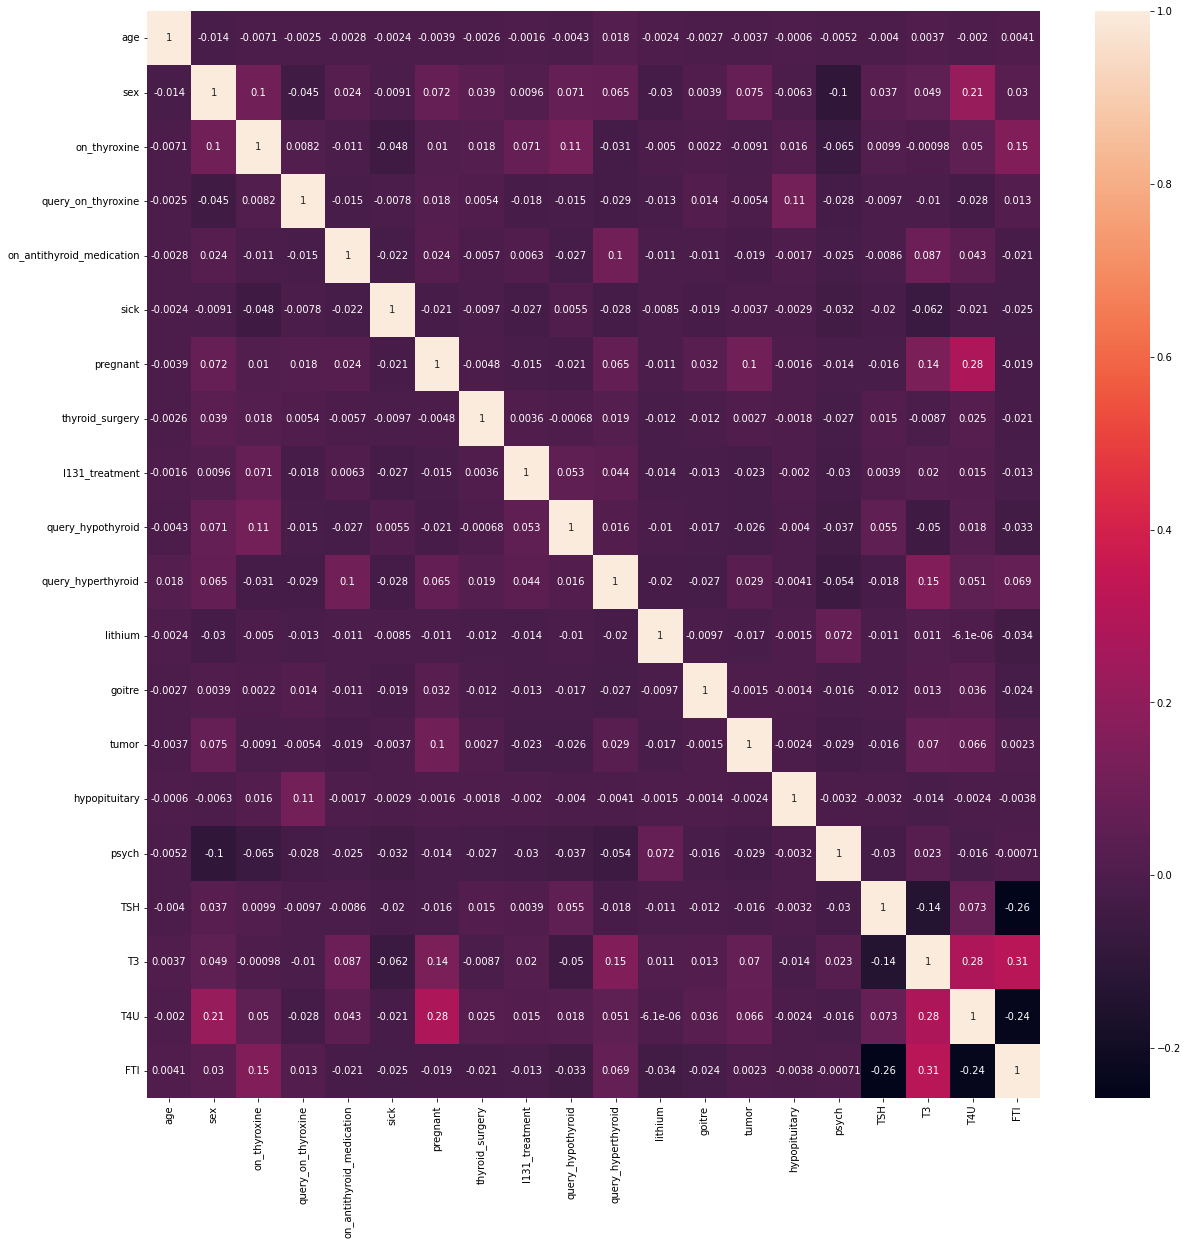

In [54]:
plt.figure(figsize=(20,20)) #plotting the heatmap of size 20 cross 20
sns.heatmap(df2.corr(),annot=True) #plotting the heatmap of correlation using the seaborn library

In [60]:
from sklearn.model_selection import train_test_split #importing the train test split function from model selection of skelarn
X_train,X_test,y_train,y_test = train_test_split(df2,y,test_size=0.33,random_state=42) #dividing the dataset into training and testing dataset

# Model Selection

In [62]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn metrics

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier #importing the descision tree classifier from the sklearn tree 
tree = DecisionTreeClassifier(max_depth=3) #making an instance the descision tree with maxdepth = 3 as passing the input
clf = tree.fit(X_train,y_train) #here we are passing our training and the testing data to the tree and fitting it
y_pred = clf.predict(X_test) #predicting the value by passing the x_test datset to the tree 
accuracy_score(y_pred,y_test)# here we are printing the accuracy score of the prediction and the testing data

0.8457218368021143

# K-NN Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier #importing the k nearest classifier from the sklearn neighbors 
neigh = KNeighborsClassifier(n_neighbors=3) #making an instance the k nearest neighbors with neighbors = 3 as passing the input
knnclf = neigh.fit(X_train,y_train) #here we are passing our training and the testing data to the tree and fitting it
y_pred = knnclf.predict(X_test) #predicting the value by passing the x_test datset to the tree 
accuracy_score(y_pred,y_test)# here we are printing the accuracy score of the prediction and the testing data

0.8186323092170465